In [285]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [395]:
function equat(x, c)
    c[1] .+ c[2]*x .+ c[3]*x.^2 .+ c[4]*x.^3 .+ c[5]*x.^4
end

equat (generic function with 2 methods)

In [396]:
I0_data = load("I0.jld")["data"]
U0_data = load("U0.jld")["data"]
I0_data = I0_data[:]
U0_data = U0_data[:];

In [397]:
f4 = fit(U0_data, I0_data, 4)

Polynomial(-14.846920206370372 + 137.30797113737475*x - 531.3525765310277*x^2 + 924.3161458728235*x^3 - 614.3210937502782*x^4)

In [398]:
f4.coeffs

5-element Vector{Float64}:
  -14.846920206370372
  137.30797113737475
 -531.3525765310277
  924.3161458728235
 -614.3210937502782

In [401]:
xtest = equat(U0_data, f4.coeffs);

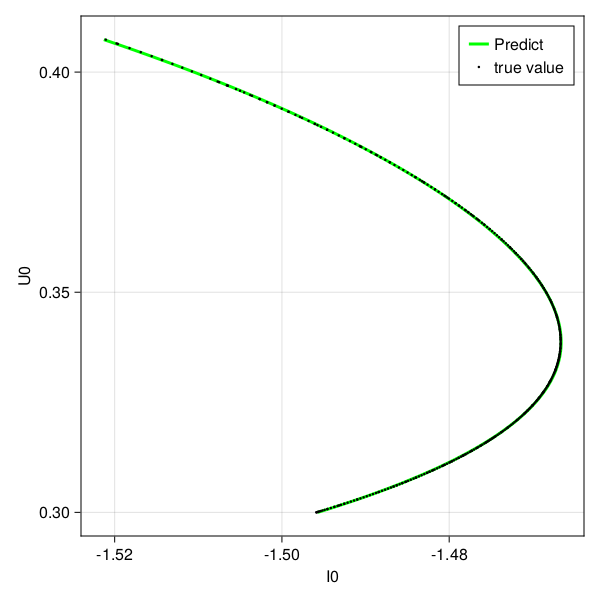

In [411]:
f = Figure(resolution = (600, 600))
axis = Axis(f[1, 1], xlabel = "I0", ylabel = "U0")
lines!(axis, xtest, U0_data, linewidth = 3.0, color = :lime, label = "Predict")
scatter!(axis, I0_data, U0_data, markersize = 3.5, color = :black, label = "true value")
axislegend()
f